# Part 1: Execute a simulation starting from a previously prepared configuration file

The goal of this tutorial is to show how you can use Inductiva API to execute a SWASH simulation starting from a pre-existing simulations input file. 

More specifically, you are going to run a SWASH simulation for the influence of break waters in Praia do Carneiro, with the real bathymetry. This simulation is configured through an input file, for which we show an excerpt here:




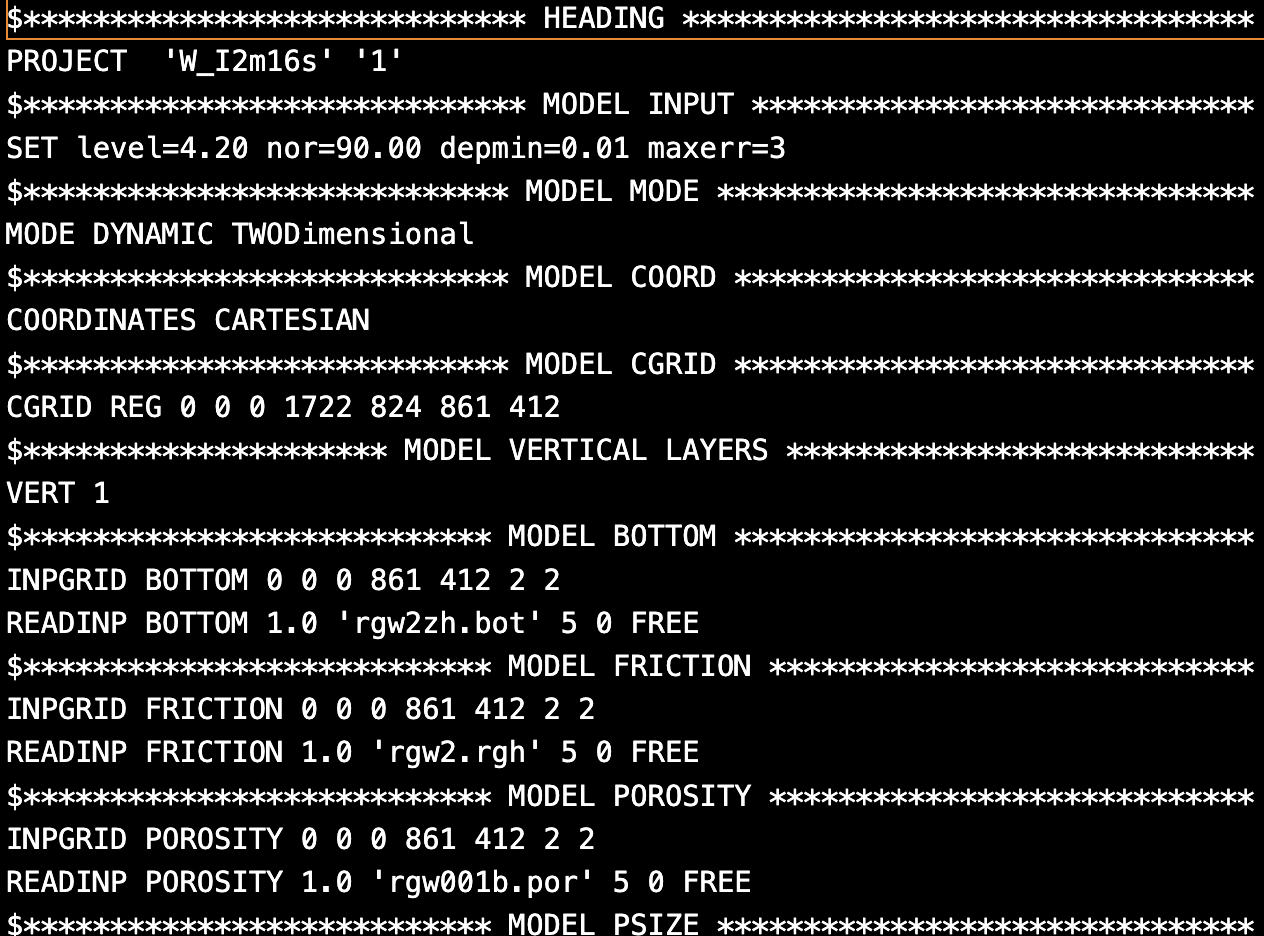


The key aspect of this tutorial is to show that you use the API to run the exact same simulation that you would run from your local machine without having to go through the pain of installing the SWASH simulator and its dependencies. 

Also, by using the API you can scale your simulation in a transparent way without the need to submit your simulation job to an MPI cluster, if you had such resource available. All of this can done using a simple python interface. 
<br>


## Summary

Here are the steps needed to run a simulation from input pre-existing configuration files.

As a pre-requisite, you need to install `inductiva` python package (and its dependencies). You only have to do this once if you are running from a command line terminal, but we will have to repeat this process throughout notebooks.

The code you need to execute is quite simple and includes:

- Initializing `inductiva`, defining user key and configuring environment (i.e., the general working directories).

- Configure the simulator class object with `inductiva.fluids.SWASH`. This tells inductiva what SWASH simulation configuration file you want to run. 

- Request the remote execution of simulation. The configuration file and other required files will be sent to our servers, and the simulation will be started. This step can take some time to finish. For this specific demo simulation you should have to wait between X and Y minutes (you will get status messages while you wait). 
 
- Process outputs. Once the simulation ends, all results will be sent back to your local machine for post-processing.
<br/>

### Install `inductiva` dependencies

First we install some packages required to process the input files and making the connection with the API.

In [ ]:
%%capture
!pip install inductiva

In [ ]:
import inductiva      # Inductiva dependencies

We need to mount the google drive here to run with input files in there. This is only done once per google colab and requires your login. 

Notice that we are not processing this information on our side, therefore, after you just need to point `inductiva` to where the input folder is. This is done via `inductiva.working_dir`.


In [ ]:
# Mount the google drive to obtain input files
from google.colab import drive
drive.mount('/content/gdrive')

inductiva.working_dir = "/content/gdrive/MyDrive/demos/"

Request your personal key by completing this [form](https://docs.google.com/forms/d/e/1FAIpQLSflytIIwzaBE_ZzoRloVm3uTo1OQCH6Cqhw3bhFVnC61s7Wmw/viewform?usp=sf_link). Add your API key below and you can start simulating right away!

In [ ]:
inductiva.api_key="YOUR_KEY_HERE"

# Pick your Simulator

We are ready to start our simulations. First, we select the simulator we want to use by initalizing a class object. 

In the following example, we use the SWASH simulator!

In [ ]:
simulator = inductiva.fluids.SWASH()

A similar structure follows for other simulators. For e.g., in bio one can have:

```simulator = inductiva.molecules.gromacs()```

## Prepare input files

It is time to prepare your input files. To run a simulation one needs to define the locations of the input directory (respective to the `inductiva.working_dir`) and the specific input file. 

We note that besides the input file the simulation may require some extra files that can descibe the domain, internal elements of the simulation, etc... As long as these files are inside the input directory, the simulation will run smoothly.

The files required for the simulation are in the directory `"config_files/swash"` and, inside, the input file is designated by `"input.sws"`. Checking this folder you will notice that there are many files inside used for the simulation. 

**Configure input directory and file:**

In [ ]:
# This directory will be relative to the working directory
input_directory = "config_files/swash"
input_file = "input.sws"

## Run the simulation

This is the point where the magic happens! We pick up all of your simulation files, send them to our servers and run the simulation on accelerated hardware!

When the simulation finishes you receive them on your side, immediately in a folder at the `inductiva.working_dir`!

To run the simulation, we use the `simulator` object initiated for SWASH previously and define the input_directory and the configuration file.

In [ ]:
# Run a simulation and measure the time it takes
output_path = simulator.run(input_dir=input_directory,
                            sim_config_filename=input_file)

Check the current drive folder for the results!

# Accelerate simulation

By default SWASH uses only 1 CPU core, but it can use more CPU cores and speed-up simulation by taking advantage of MPI. 

With **Inductiva API**, you won't need to install or configure any of it to run things in parallel. You can simply specify the number of cores you want to use to run your simulation! Let's see:

In [ ]:
output_path = simulator.run(input_dir=input_directory,
                            sim_config_filename=input_file,
                            n_cores=4)

Let's quickly compare times!


In [ ]:
from time import time
start_time_1 = time()
output_path = simulator.run(input_dir=input_directory,
                            sim_config_filename=input_file)
end_time_1 = time()

start_time_4 = time()
output_path = simulator.run(input_dir=input_directory,
                            sim_config_filename=input_file,
                            n_cores=4)
end_time_4 = time()

print("\nSWASH simulation with 1 core took %.2f s" % (end_time_1 - start_time_1))
print("SWASH simulation with 4 cores took %.2f s" % (end_time_4 - start_time_4))

It took half the time!

# Takeaway: Accelerate your simulations via Inductiva API with few lines of code


This has been great, but usually the interest is to execute more than one simulation!
In the next notebook, we show how to explore a design space of your simulations by varying some of the choosen parameters!